# 1. Import dependencies

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import xlrd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 2. reading dataset file .csv - Mnist Dataset
reading the dataset using pandas read_csv function using header flag = None.
I used the header=None for pandas to not specify the first sample as the columns names.

In [80]:
mnist = pd.read_csv("mnist.csv", header=None)

In [81]:
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Unpacking
unpacking all the features to array X, and the labels to array y.

as we can see the labels are on the first column corresponding to each row A.K.A sample data. 

In [82]:
X = mnist.iloc[:, 1:].values
y = mnist.iloc[:, 0].values
print(f"x shape is: {X.shape}\ny shape is: {y.shape}")

x shape is: (70000, 784)
y shape is: (70000,)


# 4. splitting to train test datasets.
using train_test_split function from sklearn splitting the dataset into 80% train and 20% test.

In [83]:
from sklearn.model_selection import train_test_split
# cross validation. split-train-test
# splitting the data to 20% test 80% train. 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=40)

In [84]:
# we will use: Decision tree, Random forest, and Logistic regression)
# import models:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

### 4.1 building a pipline 

storing all the machine learning model in dictionary.

In [108]:
from sklearn.pipeline import make_pipeline

# creating the pipline for running the different models.
piplines = {
    'decisiontreeclassifier':make_pipeline(DecisionTreeClassifier()),
    'ovo_logistic':make_pipeline(OneVsOneClassifier(LogisticRegression(solver='sag', random_state=1234))),
    'ovr_logistic':make_pipeline(OneVsRestClassifier(LogisticRegression(multi_class='ovr', random_state=1234))),
    'rf':make_pipeline(RandomForestClassifier(random_state=1234)),

}

### 4.2 Creating a hyper-grid
for each algorithm we will choose a range of potential values for the different hyperparameters that we can twick for obtaine best results.

In [ ]:
hypergrid = {
    'rf':{
        'randomforestclassifier__n_estimators':[10,50,100,130],
        'randomforestclassifier__criterion':['gini', 'entropy'],
        'randomforestclassifier__max_depth':[2, 3],
        'randomforestclassifier__min_samples_split':[3,4,5,6],
        'randomforestclassifier__min_samples_leaf':[2,3,4,5,6],
        'randomforestclassifier__max_features':['auto', 'log2']
    },
    'decisiontreeclassifier':{
        'decisiontreeclassifier__max_depth': [2,4,6,8],
        'decisiontreeclassifier__min_samples_split': [2,4,6,8]
    },
    'ovo_logistic':{  
    },
    'ovr_logistic':{   
    }   
}

# 5. Training 
1. using GridSearch algorithm training each model using K-folds as our cross validation algorithm.
2. saving the fitted models and their scores the dictionaries for later evalution.

In [ ]:
from sklearn.model_selection import GridSearchCV

fit_models = {}
scores = []

for algo, pipline in piplines.items():
    # run grid search to find best hyper parameters with K-folds cross validation (K=10)
    print(pipline)
    print(hypergrid[algo])
    model = GridSearchCV(pipline, hypergrid[algo], cv=10, n_jobs=-1)
    
    try:
        print("starting training for {}".format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print("{} trained succefully!".format(algo))
        scores.append({
            'model_name': algo,
            'best_score': model.best_score_, # average f1-score for each model in the cross validation. 
            'best_params': model.best_params_
        })
    except NotFittedError as e:
        print(repr(e))
    except Exception as e:
        print(e)
        print(repr(e))

In [128]:
scores

[{'model_name': 'decisiontreeclassifier',
  'best_score': 0.812,
  'best_params': {'decisiontreeclassifier__max_depth': 8,
   'decisiontreeclassifier__min_samples_split': 2}},
 {'model_name': 'ovo_logistic',
  'best_score': 0.9336428571428573,
  'best_params': {}},
 {'model_name': 'ovr_logistic',
  'best_score': 0.9139464285714286,
  'best_params': {}},
 {'model_name': 'rf',
  'best_score': 0.7647142857142857,
  'best_params': {'randomforestclassifier__criterion': 'gini',
   'randomforestclassifier__max_depth': 3,
   'randomforestclassifier__max_features': 'log2',
   'randomforestclassifier__min_samples_leaf': 2,
   'randomforestclassifier__min_samples_split': 3,
   'randomforestclassifier__n_estimators': 100}}]

In [129]:
fit_models

{'decisiontreeclassifier': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('decisiontreeclassifier',
                                         DecisionTreeClassifier())]),
              n_jobs=-1,
              param_grid={'decisiontreeclassifier__max_depth': [2, 4, 6, 8],
                          'decisiontreeclassifier__min_samples_split': [2, 4, 6,
                                                                        8]}),
 'ovo_logistic': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('onevsoneclassifier',
                                         OneVsOneClassifier(estimator=LogisticRegression(random_state=1234,
                                                                                         solver='sag')))]),
              n_jobs=-1, param_grid={}),
 'ovr_logistic': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('onevsrestclassifier',
                                         OneVsRestClassifier(estimator=LogisticRegression(multi_c

# 6. Testing the model's performance

extract the accuracy, recall, precision, f1-score, confusion matrix and AUC results of each model.

saving the scores into a dictionary for visualization.

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, auc, roc_curve

In [231]:
# predicting and extracting:
# accuracy, recall, precision, f1-score, AUC
results=[]
for algo, model in fit_models.items():
    predictions = model.predict(X_test)
    print()
    results.append({
        'algo':algo,
        'yhat':predictions,
        'acc':accuracy_score(y_test, predictions),
        'conf_mat':confusion_matrix(y_test, predictions, labels=[0,1,2,3,4,5,6,7,8,9]),
        'prf_weighted':precision_recall_fscore_support(y_test, predictions, average='weighted'),
        'dis_classes':model.classes_
    })

# 7. Visualized Confusion Matrix & results

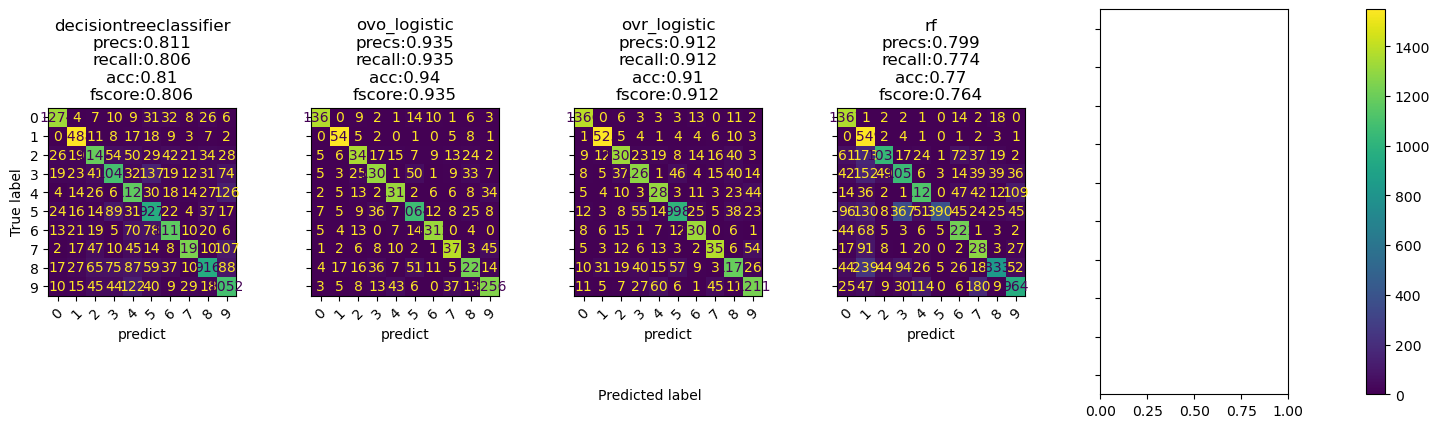

In [233]:
# visualizing the confusion matrix: 
f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')
for i, res in enumerate(results):
    algo, yhat, conf_mat, dis_classes=res['algo'], res['yhat'], res['conf_mat'],res['dis_classes']
    prec, recall, fscore = res['prf_weighted'][0],res['prf_weighted'][1],res['prf_weighted'][2]
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=dis_classes)
    acc = res['acc']
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(f"{algo}\nprecs:{round(prec,3)}\nrecall:{round(recall,3)}\nacc:{round(acc,2)}\nfscore:{round(fscore,3)}" )
    
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('predict')
    if i!=0:
        disp.ax_.set_ylabel('')


f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

In [206]:
from sklearn.metrics import roc_auc_score

# 8. Visualized the AUC

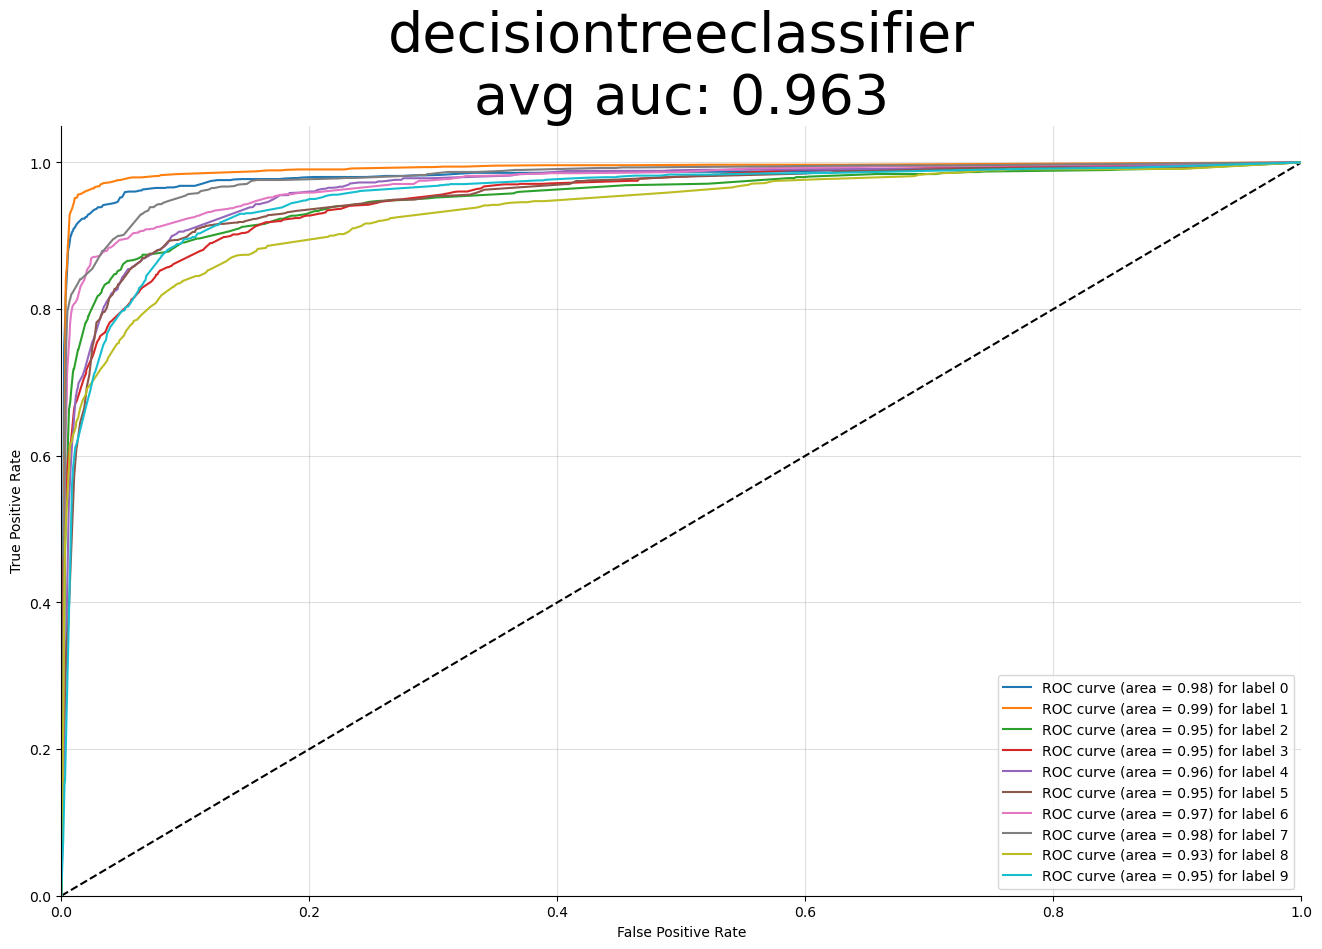

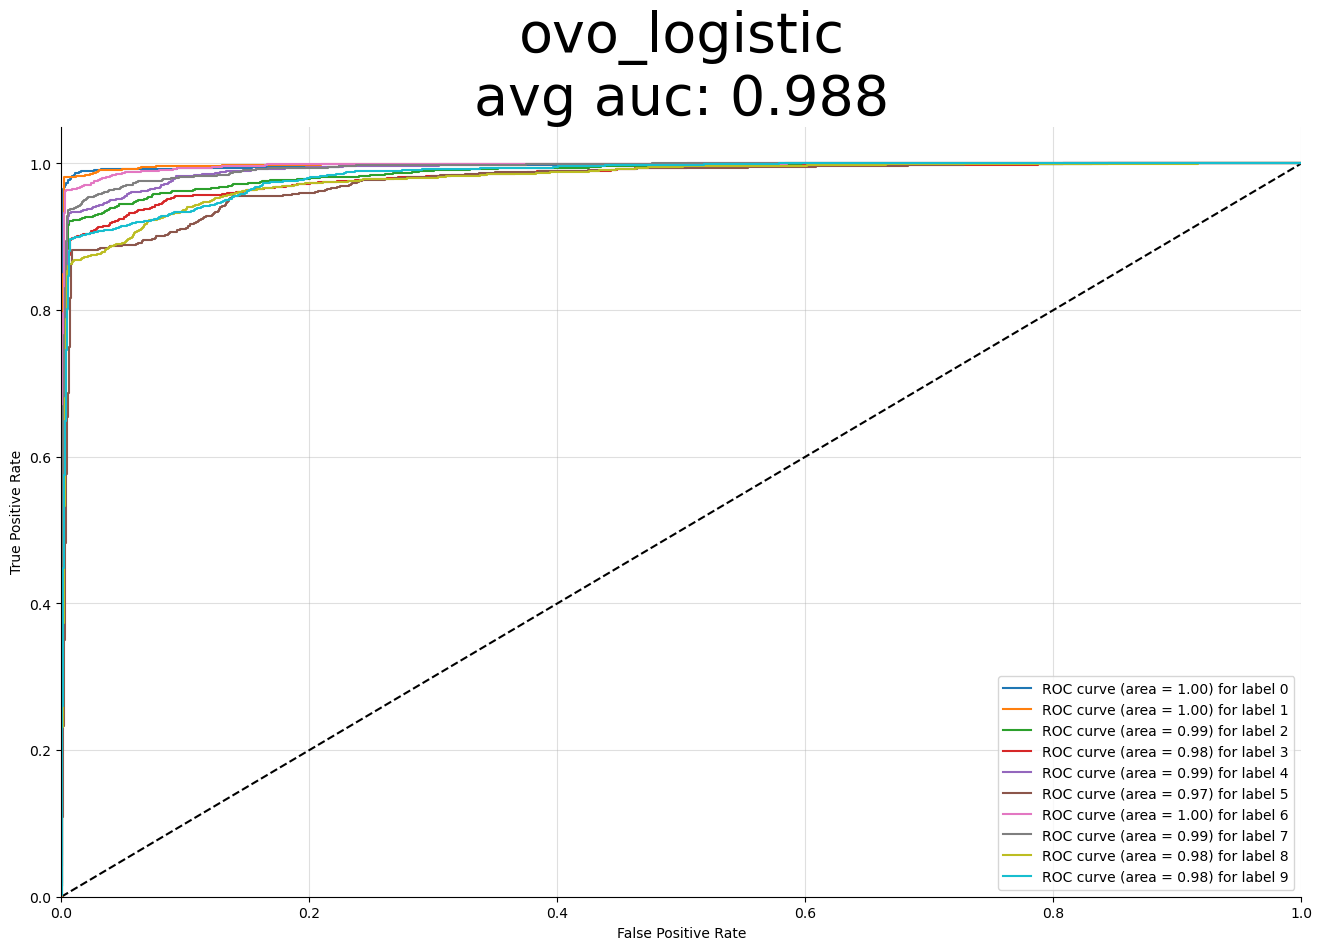

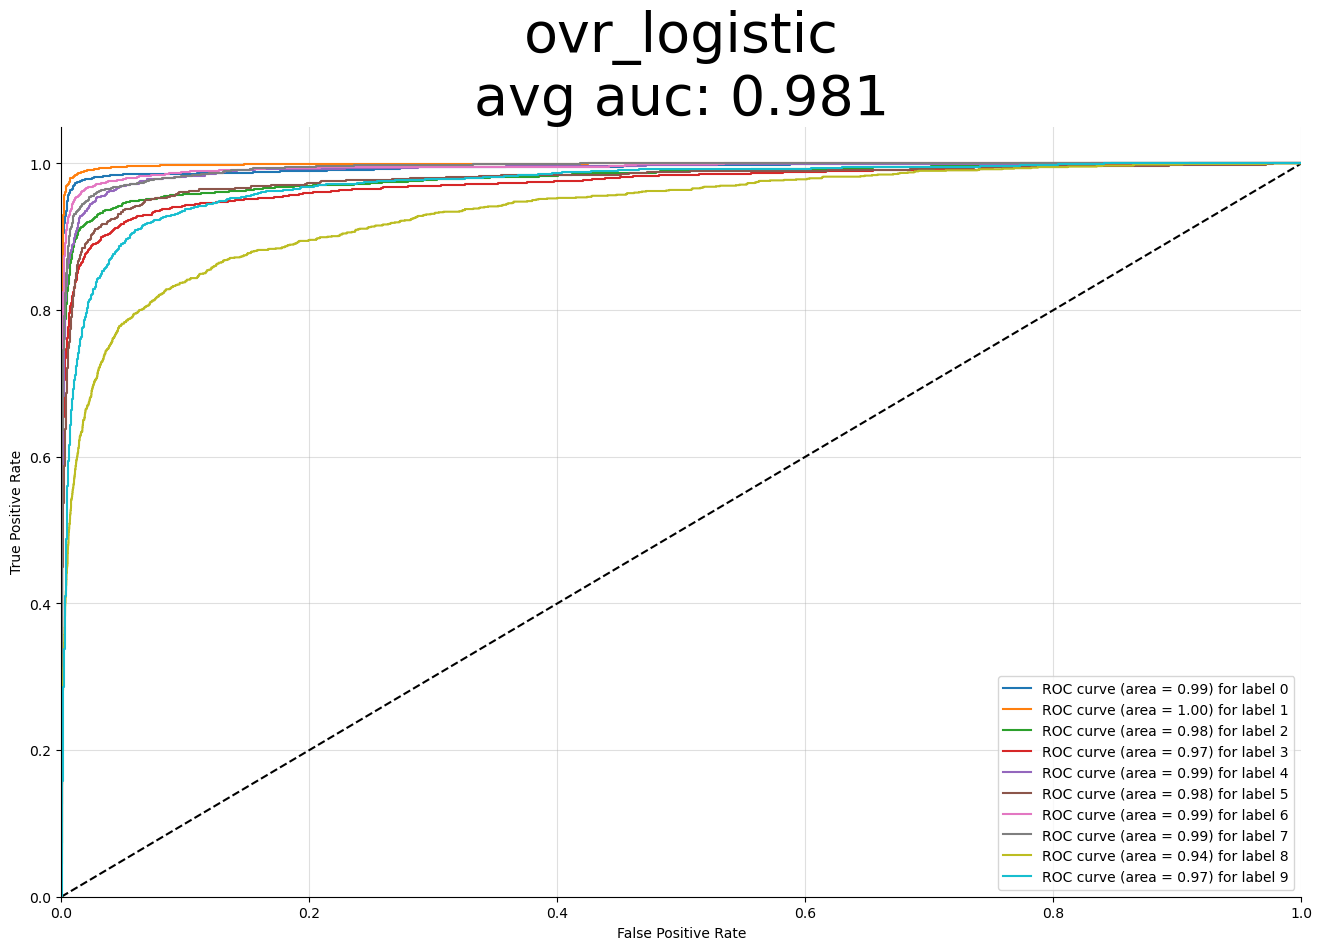

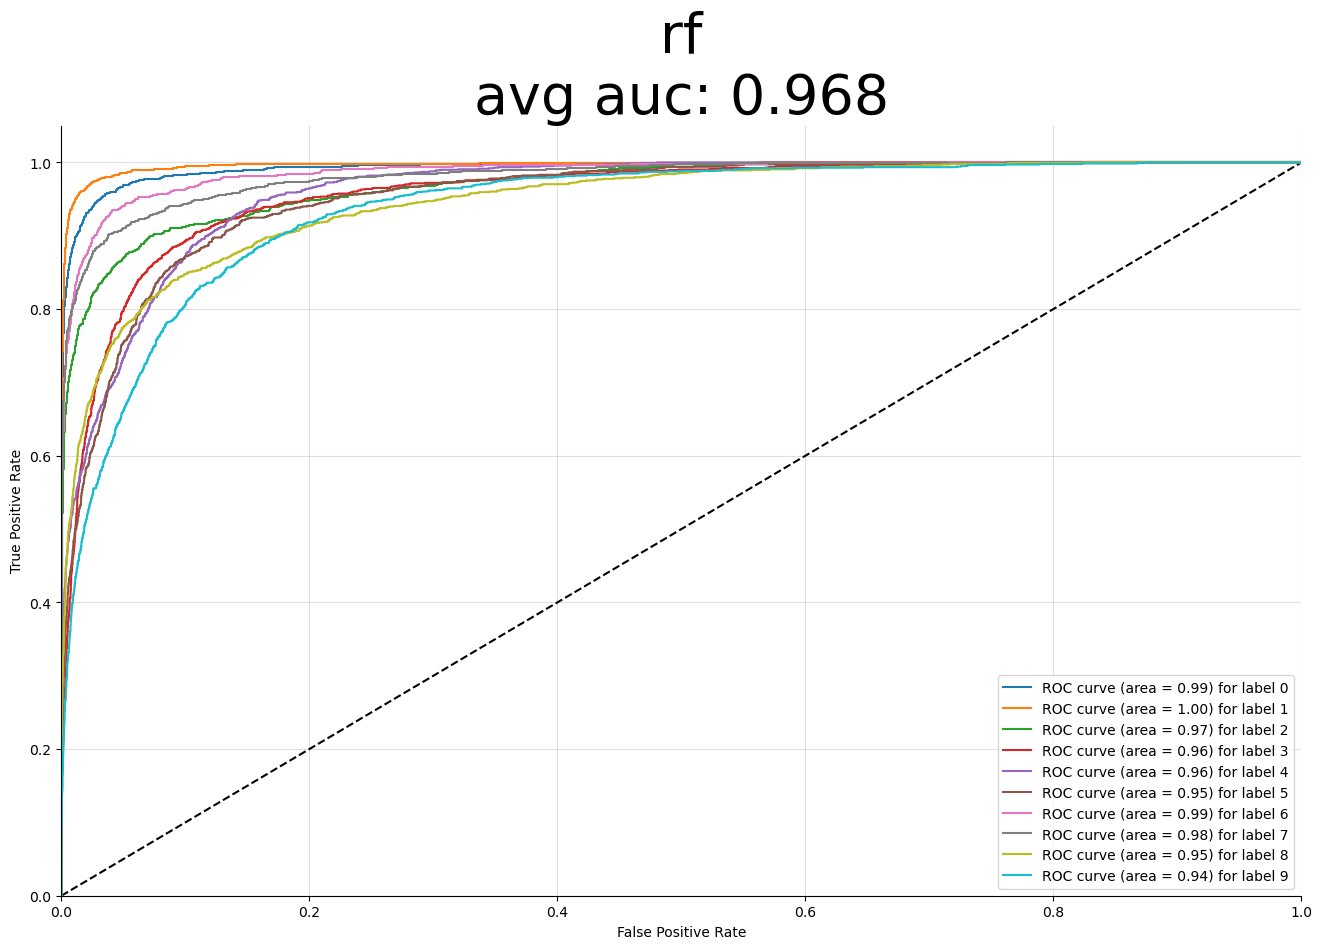

In [241]:
def plot_multiclass_roc(clf_name, clf, X_test, y_test, n_classes, figsize=(17, 6)):
    if clf_name=="decisiontreeclassifier" or clf_name=="rf":
        y_score = model.predict_proba(X_test)
    else:
        y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    mean_auc=0
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        label_auc_score = auc(fpr[i], tpr[i])
        roc_auc[i] = label_auc_score
        mean_auc=mean_auc+label_auc_score
    mean_auc = round(mean_auc/n_classes, 3) # x.xxx decimal point
    
    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(clf_name + '\navg auc: '+str(mean_auc), fontsize = 40)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

    
for algo, model in fit_models.items():
    
    plot_multiclass_roc(algo, model, X_test, y_test, n_classes=10, figsize=(16, 10))